# A short walkthrough of MatPlotLib
[link to the guide](https://realpython.com/python-matplotlib-guide/)

In [1]:
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(444)

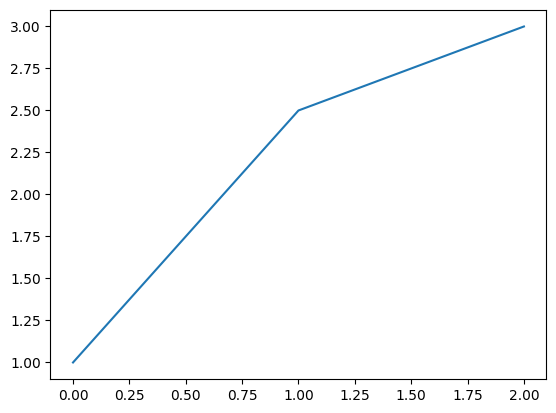

In [4]:
plt.plot([1, 2.5, 3])

matplotlib.figure.Figure

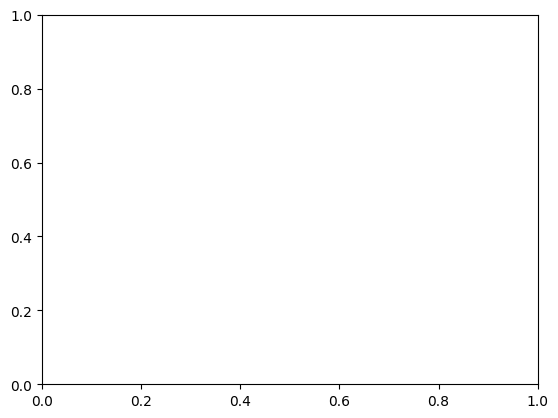

In [3]:
fig, _ = plt.subplots()
type(fig)

In [5]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

## Anatomy of a figure
![img](https://realpython.com/cdn-cgi/image/width=500,format=auto/https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)

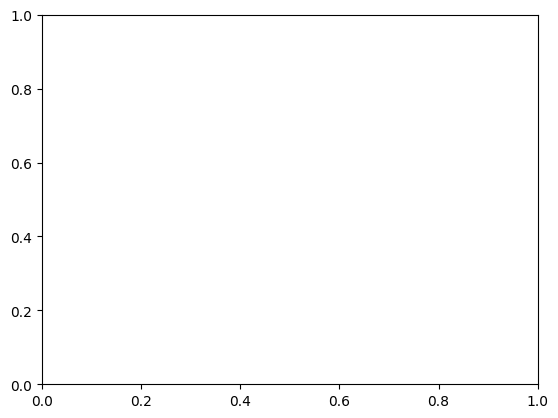

In [6]:
fig, ax = plt.subplots()

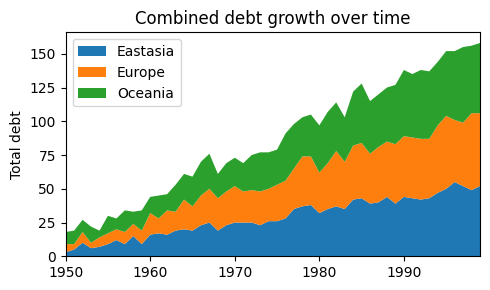

In [12]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng
fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=["Eastasia", "Europe", "Oceania"])
ax.set_title("Combined debt growth over time")
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

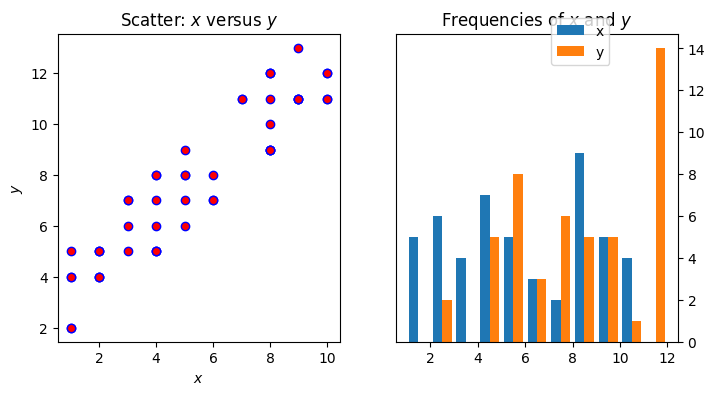

In [17]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title("Scatter: $x$ versus $y$")
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))
ax2.legend(loc=(0.55,0.9))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

In [18]:
(fig.axes[0] is ax1, fig.axes[1] is ax2)

(True, True)

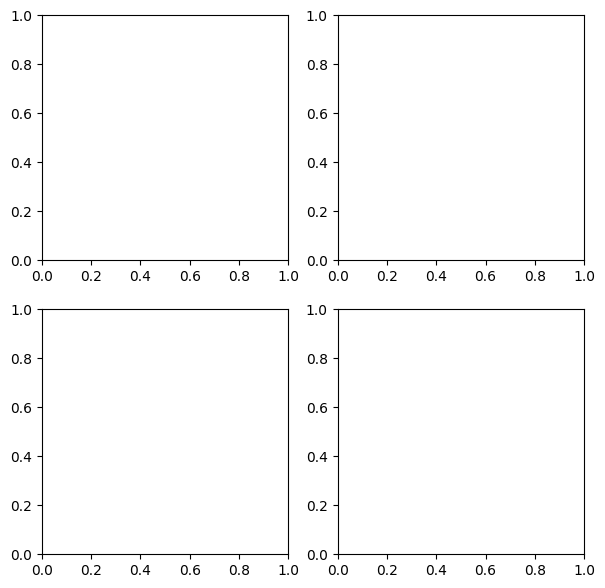

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

In [20]:
ax1, ax2, ax3, ax4 = ax.flatten()

In [21]:
from io import BytesIO
import tarfile
from urllib.request import urlopen
url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [23]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T
print(y, pop, age)

[452600. 358500. 352100. ...  92300.  84700.  89400.] [ 129. 1106.  190. ...  485.  409.  616.] [8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]


In [24]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
            horizontalalignment='center',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.6),
            fontsize=12.5)
    return ax

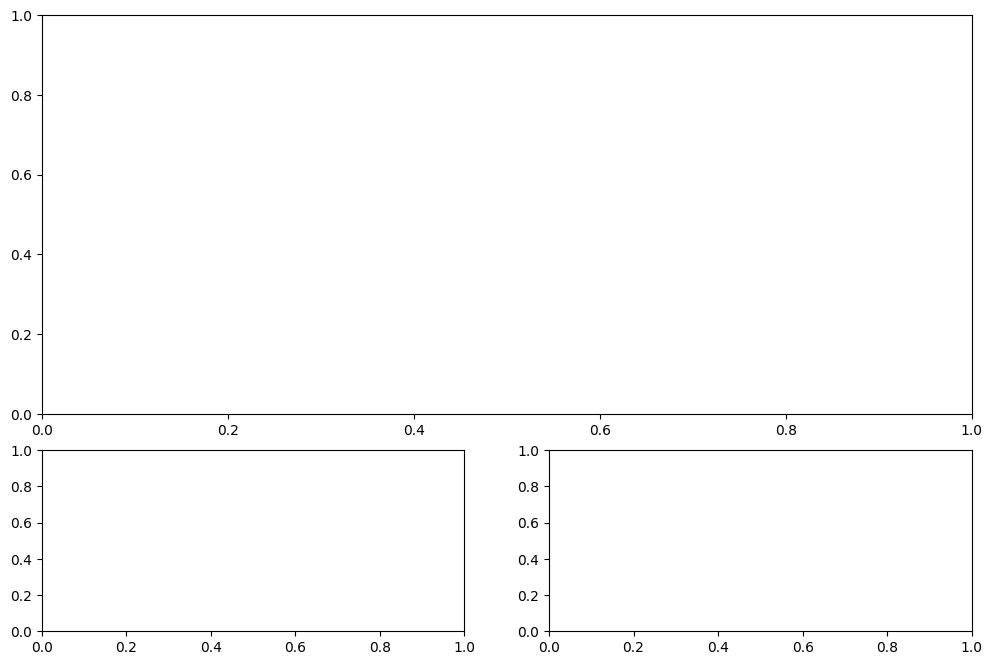

In [38]:

gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))


In [39]:
ax1.set_title('Home value...', fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population log scale.')

/var/folders/9b/rkxr4tx941l76qtgtn679kth0000gn/T/ipykernel_65706/4077753308.py:3: UserWarning: Adding colorbar to a different Figure <Figure size 1200x800 with 4 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(sctr, ax=ax1, format='$%d')


<Axes: >

<Figure size 640x480 with 0 Axes>

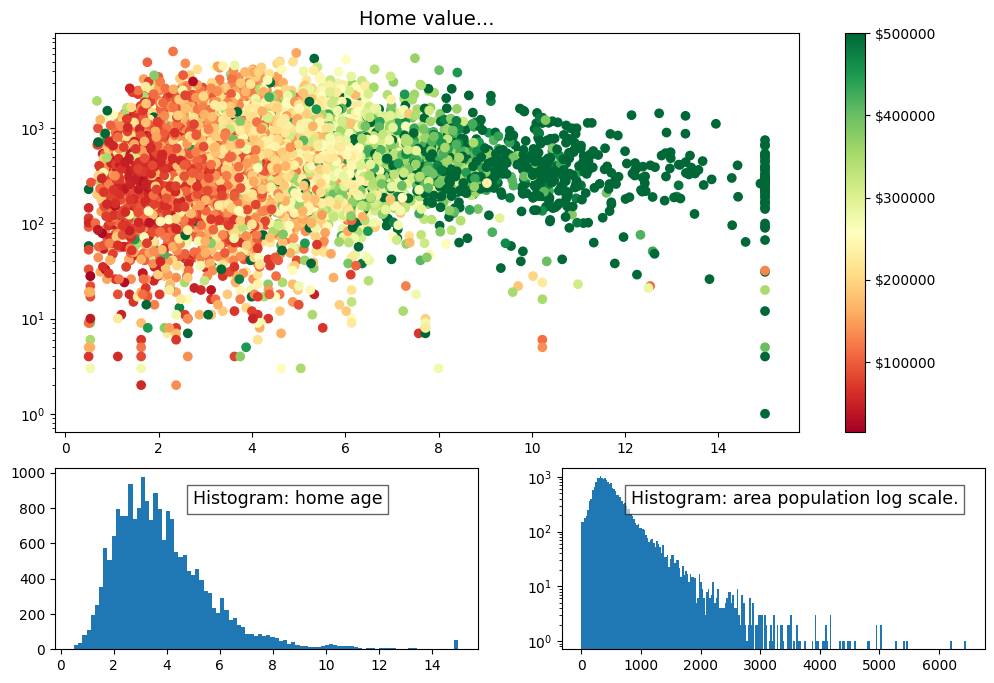

In [40]:
fig

In [41]:
plt.get_fignums()

[]

In [44]:
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x2 = np.arange(x.size).reshape(x.shape)
print(x, '\n\n', x2)

[[ 2  0  0  0  0  0  0  0  0 11]
 [ 0  3  0  0  0  0  0  0 10  0]
 [ 0  0  4  0  0  0  0  9  0  0]
 [ 0  0  0  5  0  0  8  0  0  0]
 [ 0  0  0  0  6  7  0  0  0  0]
 [ 0  0  0  0  6  7  0  0  0  0]
 [ 0  0  0  5  0  0  8  0  0  0]
 [ 0  0  4  0  0  0  0  9  0  0]
 [ 0  3  0  0  0  0  0  0 10  0]
 [ 2  0  0  0  0  0  0  0  0 11]] 

 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


# Figures manipulations

5035770320
5035770320
True


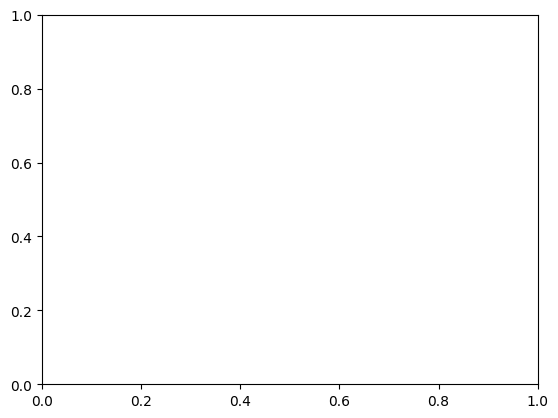

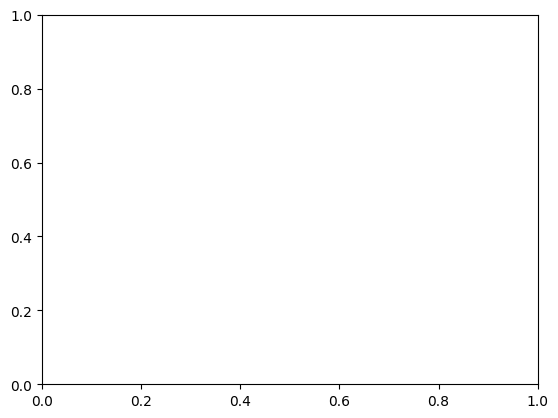

In [9]:
fig1, ax1 = plt.subplots()

print(id(fig1))

print(id(plt.gcf()))

fig2, ax2 = plt.subplots()
print(id(fig2) == id(plt.gcf()))

In [ ]:

plt.get_fignums()


In [11]:
def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]
get_all_figures()

[]

In [12]:
plt.close()
plt.close(0)
plt.close('all')
get_all_figures()

[]

In [45]:
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)

{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


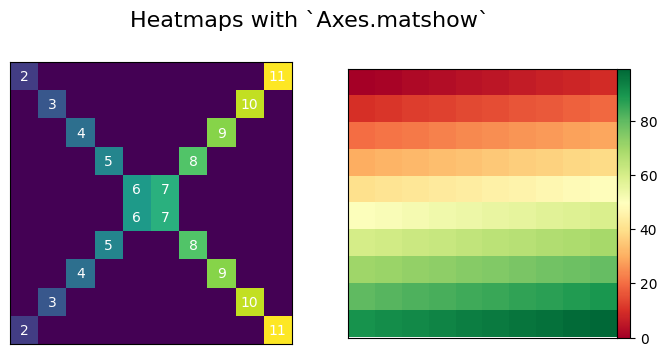

In [53]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

with plt.rc_context(rc={'axes.grid': False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.matshow(x)
    img2 = ax2.matshow(x2, cmap="RdYlGn")
    for ax in (ax1, ax2):
        ax.tick_params(axis='both', which='both', **nolabels)
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')
    
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    fig.suptitle("Heatmaps with `Axes.matshow`", fontsize=16)

# Plotting in Pandas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<class 'matplotlib.axes._axes.Axes'>


True

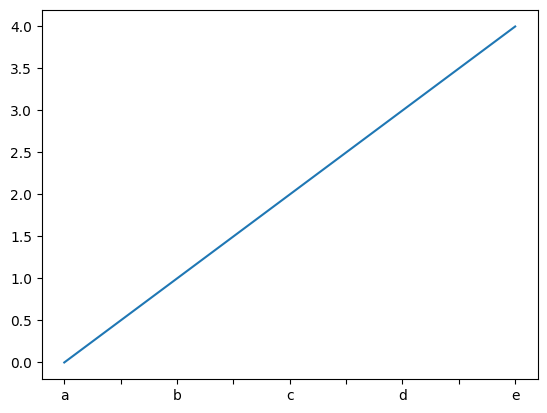

In [8]:
s = pd.Series(np.arange(5), index=list('abcde'))
ax = s.plot()

print(type(ax))

id(plt.gca()) == id(ax)